In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [28]:
train.head(1)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,time_diff
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 12:29:59,2009-05-03 12:30:17,2009-04-25 00:45:07,2009-04-25 01:22:03,3,1,8


In [6]:
# convert unix time format
import datetime
unix_cols = ['deadline','state_changed_at','launched_at','created_at']

for x in unix_cols:
    train[x] = train[x].apply(lambda k: datetime.datetime.fromtimestamp(int(k)).strftime('%Y-%m-%d %H:%M:%S'))
    test[x] = test[x].apply(lambda k: datetime.datetime.fromtimestamp(int(k)).strftime('%Y-%m-%d %H:%M:%S'))



In [7]:
train['time_gap']=train['state_changed_at'].astype('datetime64[ns]')-train['launched_at'].astype('datetime64[ns]')

In [8]:
# train['diff']=train['time_gap'].apply(lambda x: float(x.item().days)/365)
train['time_diff']=train['time_gap'].dt.total_seconds() / (24 * 60 * 60)
train['time_diff'].astype(int)
del train['time_gap']


In [11]:
train['time_diff']=train['time_diff'].astype(int)

In [13]:
train.time_diff[0]

8

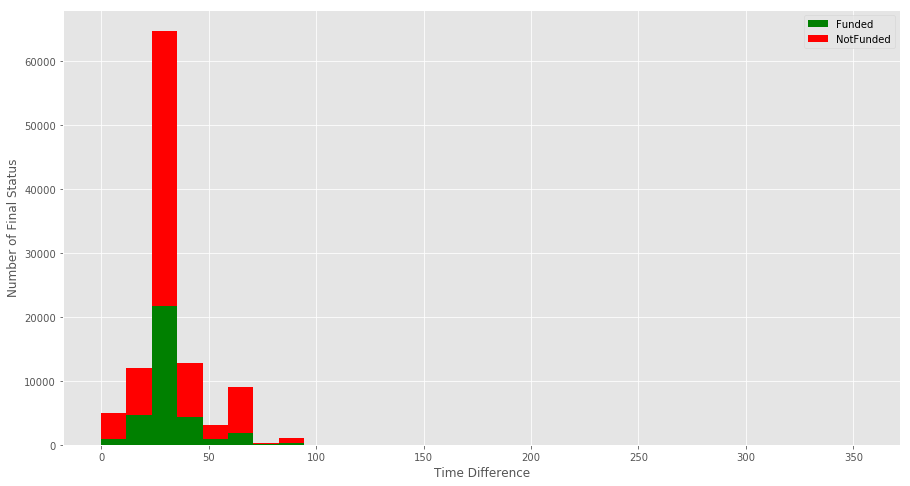

In [27]:
# Figuring out if there is a prominent relationship between the Time Differnce & The Final Status

figure = plt.figure(figsize=(15,8))
plt.hist([train[train['final_status']==1]['time_diff'], train[train['final_status']==0]['time_diff']], stacked=True, color = ['g','r'],
         bins =30,label = ['Funded','NotFunded'])
plt.xlabel('Time Difference')
plt.ylabel('Number of Final Status')
plt.legend()

# Concludes to no direct relation :/

In [54]:
# Let's analyse with country :P

funded_c=train[train['final_status']==1]['country'].value_counts()
nfunded_c=train[train['final_status']==0]['country'].value_counts()
df = pd.DataFrame([funded_c, nfunded_c])
df.index = ['Funded','Not Funded']
df.plot(kind='bar',stacked=True, figsize=(15,8))

# Seems like US origin projects have a prob of 0.49 to get funded!


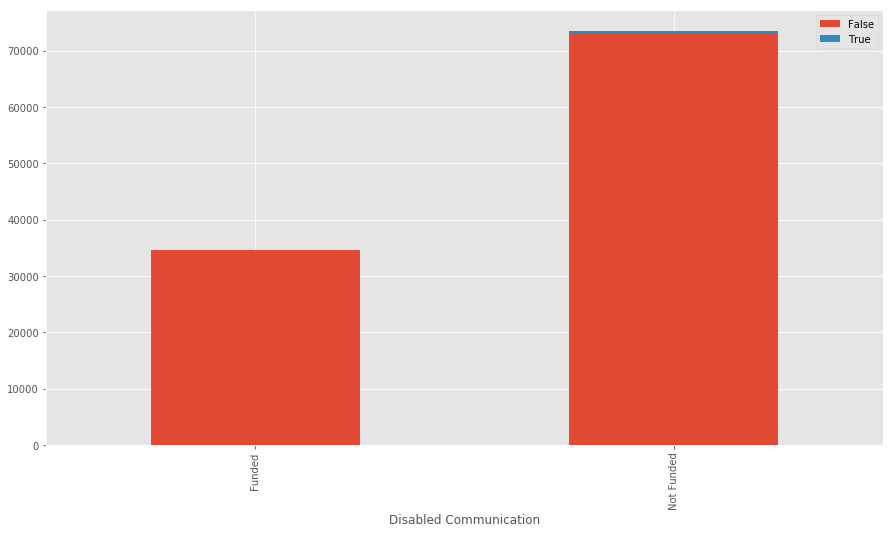

In [60]:
# Lets analyse with disable communication
funded_dc=train[train['final_status']==1]['disable_communication'].value_counts()
nfunded_dc=train[train['final_status']==0]['disable_communication'].value_counts()
df = pd.DataFrame([funded_c, nfunded_c])
df.index = ['Funded','Not Funded']
df.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel('Disabled Communication')


# All those funded , had disable communication value of 'False'
# All those whose disable communication value was 'True' had not been funded. Ring a bell , eh?

In [69]:
# Lets analyse with the goal variable
train.goal.value_counts()


5000.0       8759
10000.0      6789
1000.0       5265
3000.0       5012
2000.0       4760
2500.0       3884
15000.0      3616
500.0        3547
1500.0       3459
20000.0      3202
4000.0       2673
25000.0      2590
6000.0       2295
50000.0      2274
3500.0       2273
8000.0       1928
30000.0      1796
7500.0       1491
7000.0       1477
12000.0      1353
100000.0     1179
1200.0       1007
300.0         946
4500.0        926
600.0         902
5500.0        844
35000.0       839
800.0         815
40000.0       798
6500.0        702
200.0         681
100.0         671
750.0         637
250.0         623
9000.0        599
400.0         582
75000.0       539
60000.0       532
700.0         489
8500.0        476
18000.0       474
150000.0      371
11000.0       366
45000.0       360
12500.0       355
350.0         349
900.0         338
2200.0        328
1800.0        323
16000.0       310
             ... 
984.0           1
376.0           1
45950.0         1
42320.0         1
37750.0   

In [70]:
train.final_status.value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

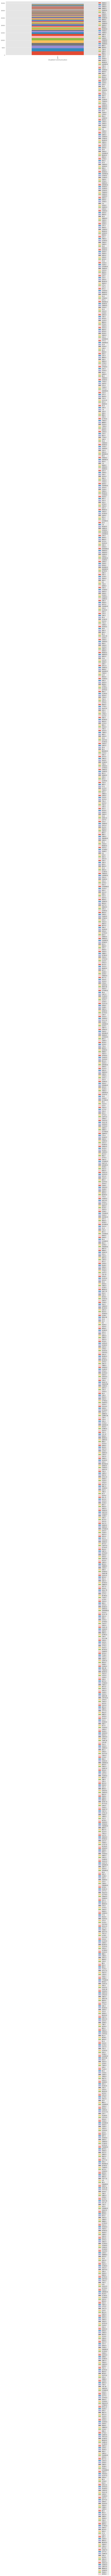

In [97]:
tg=train[train['final_status']==1]['goal'].value_counts()
df = pd.DataFrame([tg])
# df.index = ['Funded','Not Funded']
df.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel('Disabled Communication')

## Gives absolutely no Idea 


In [99]:
# creating feautres 
cols_to_use = ['name','desc']
len_feats = ['name_len','desc_len']
count_feats = ['name_count','desc_count']

for i in np.arange(2):
    train[len_feats[i]] = train[cols_to_use[i]].apply(str).apply(len)
    train[count_feats[i]] = train[cols_to_use[i]].apply(str).apply(lambda x: len(x.split(' ')))



In [102]:
train.head(1)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,time_diff,name_len,name_count,desc_len,desc_count,keywords_len,keywords_count
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 12:29:59,2009-05-03 12:30:17,2009-04-25 00:45:07,2009-04-25 01:22:03,3,1,8,19,3,134,26,19,3


In [101]:
train['keywords_len'] = train['keywords'].apply(str).apply(len)
train['keywords_count'] = train['keywords'].apply(str).apply(lambda x: len(x.split('-')))


In [103]:
for i in np.arange(2):
    test[len_feats[i]] = test[cols_to_use[i]].apply(str).apply(len)
    test[count_feats[i]] = test[cols_to_use[i]].apply(str).apply(lambda x: len(x.split(' ')))
    
test['keywords_len'] = test['keywords'].apply(str).apply(len)
test['keywords_count'] = test['keywords'].apply(str).apply(lambda x: len(x.split('-')))

In [104]:
# Trying out our first model
from sklearn.preprocessing import LabelEncoder

feat = ['disable_communication','country']
for x in feat:
    le = LabelEncoder()
    le.fit(list(train[x].values) + list(test[x].values))
    train[x] = le.transform(list(train[x]))
    test[x] = le.transform(list(test[x].values))


In [105]:
cols_to_use = ['name_len'
                 ,'desc_len'
                 ,'keywords_len'
                 ,'name_count'
                 ,'desc_count'
                 ,'keywords_count']

target = train['final_status']

# data for modeling
k_train = train[cols_to_use]
k_test = test[cols_to_use]

In [109]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nvb_pred = gnb.fit(k_train, target).predict(k_test)
nBsub = pd.DataFrame({'project_id':test['project_id'],'final_status':nvb_pred})
nBsub = nBsub[['project_id','final_status']]
nBsub.to_csv("nBstarter.csv",index = False)
